In [83]:
import pandas as pd
import os
import warnings
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
import time

warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [86]:
## Convert Month and Day to Int
month_dic = {str.lower(month): index for index, month in enumerate(calendar.month_abbr) if month}

df['month_No'] = df['month'].apply(lambda x: month_dic[x])

df['day_No'] = df['day'].apply(lambda x: time.strptime(x.capitalize(), '%a').tm_wday)
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_No,day_No
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,3,4
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,10,1
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,10,5
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,3,4
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,8,6
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,8,6
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,8,6
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,8,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         517 non-null    int64  
 1   Y         517 non-null    int64  
 2   FFMC      517 non-null    float64
 3   DMC       517 non-null    float64
 4   DC        517 non-null    float64
 5   ISI       517 non-null    float64
 6   temp      517 non-null    float64
 7   RH        517 non-null    int64  
 8   wind      517 non-null    float64
 9   rain      517 non-null    float64
 10  area      517 non-null    float64
 11  month_No  517 non-null    int64  
 12  day_No    517 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 52.6 KB
None


array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'month_No'}>],
       [<Axes: title={'center': 'day_No'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

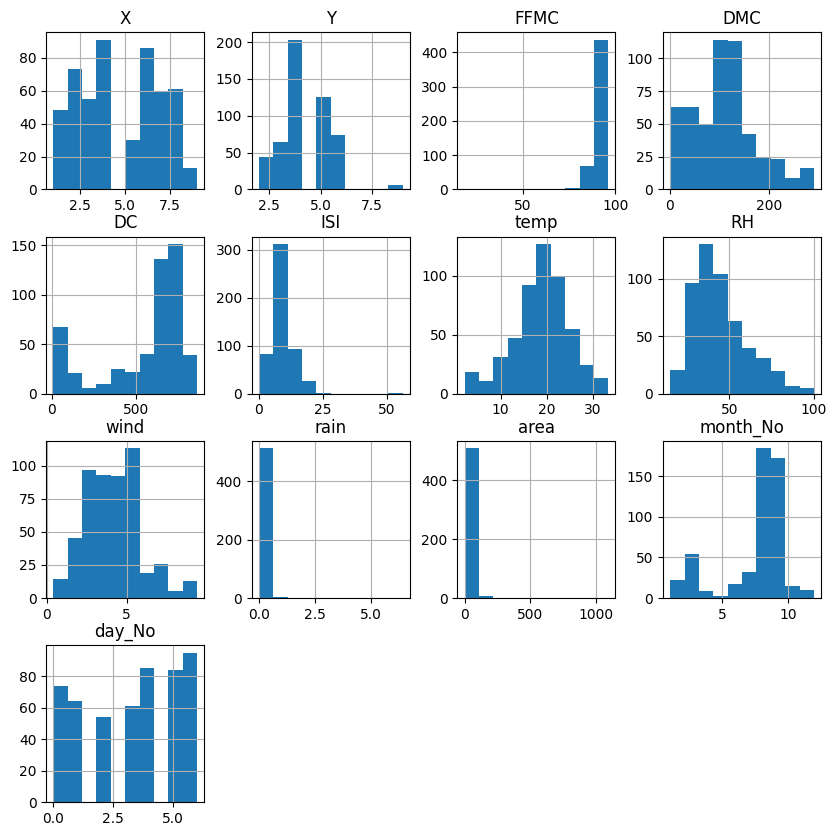

In [87]:
df.drop(columns=['day', 'month'], inplace=True)
print(df.info())

df.hist(figsize=(10, 10))
# Assumptions: 
# 1- Year column Can be dropped
# 2- Correlation Between features and Class Should be Checked

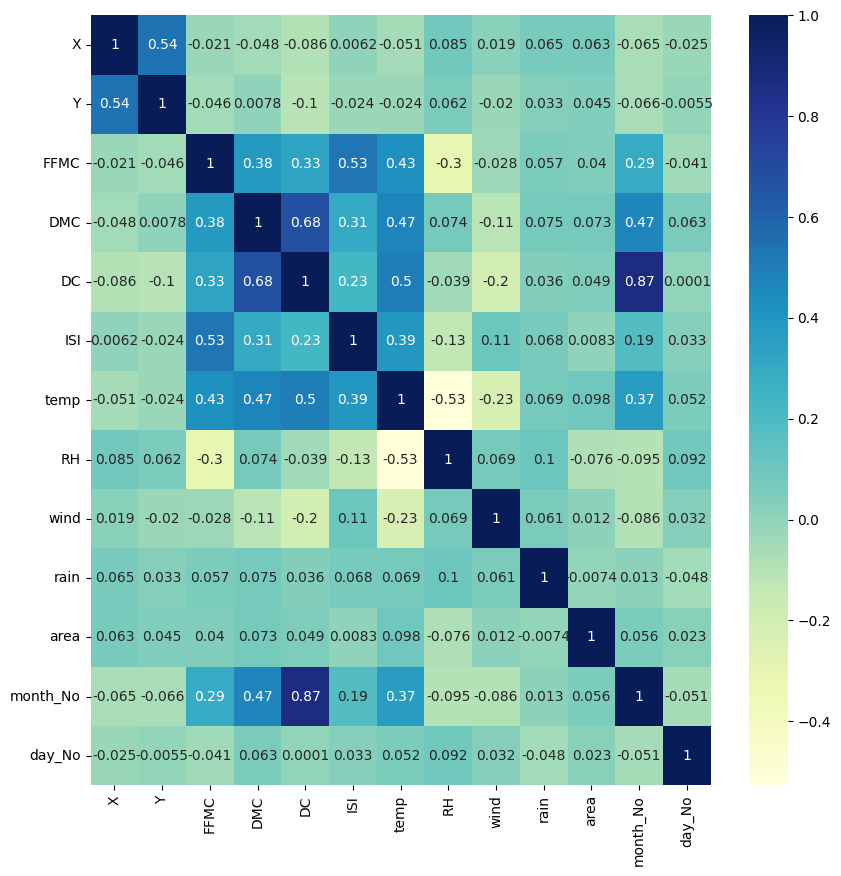

In [88]:

plt.figure(figsize=(10,10))
fig = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, Y = df.drop(columns='area'), df['area']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

clf = LinearRegression()

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

mean_squared_error(y_true=y_test, y_pred=y_pred)

11882.74580625768